<a href="https://colab.research.google.com/github/MughalUsama/Brain-tumor-segmentation-FYP/blob/d3/resnet50train3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting  Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import h5py
import cv2
#from PIL import Image

In [3]:
Xtrain = np.ndarray(shape = (900,512,512)) #1564 + 500 + 1000
Ytrain = np.zeros(900)

# Xval = np.ndarray(shape = (500,512,512)) #1564 + 500 + 1000
# Yval = np.zeros(500)

# Xtest = np.ndarray(shape = (1000,512,512)) #1564 + 500 + 1000
# Ytest = np.zeros(1000)

train_count = 0
test_count= 0
val_count = 0

In [4]:
i = 1
while i <3065:   
    if train_count < 900:
        if i < 767:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor1.zip (Unzipped Files)/'
        elif i < 1533:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor3.zip (Unzipped Files)/'
        elif i < 2299:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor2.zip (Unzipped Files)/'
        else:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor4.zip (Unzipped Files)/'

        f = h5py.File(path+str(i)+'.mat','r')
        gr = f.get('cjdata')
        im = np.array(gr.get('image'))
        norm_image = cv2.normalize(im, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) #for normalizing the images of dataset
        norm_image = cv2.resize(norm_image, (512,512), interpolation = cv2.INTER_AREA)
        Xtrain[train_count] = np.array(norm_image)
        Ytrain[train_count] = gr.get('label')[()]
        train_count +=1
        i+=3
        print(i)
    else:
      break
    # if test_count < 1000:
    #     if i < 767:
    #       path = '/content/drive/MyDrive/TUMOR DATASET/tumor1.zip (Unzipped Files)/'
    #     elif i < 1533:
    #       path = '/content/drive/MyDrive/TUMOR DATASET/tumor3.zip (Unzipped Files)/'
    #     elif i < 2299:
    #       path = '/content/drive/MyDrive/TUMOR DATASET/tumor2.zip (Unzipped Files)/'
    #     else:
    #       path = '/content/drive/MyDrive/TUMOR DATASET/tumor4.zip (Unzipped Files)/'

    #     # f = h5py.File(path+str(i)+'.mat','r')
    #     # gr = f.get('cjdata')
    #     # im = np.array(gr.get('image'))
    #     # norm_image = cv2.normalize(im, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) #for normalizing the images of dataset
    #     # norm_image = cv2.resize(norm_image, (512,512), interpolation = cv2.INTER_AREA)

    #     # Xtest[test_count] = np.array(norm_image)
    #     # Ytest[test_count] = gr.get('label')[()]
    #     test_count +=1
    #     i+=1

    # if val_count < 500:
    #     if i < 767:
    #       path = '/content/drive/MyDrive/TUMOR DATASET/tumor1.zip (Unzipped Files)/'
    #     elif i < 1533:
    #       path = '/content/drive/MyDrive/TUMOR DATASET/tumor3.zip (Unzipped Files)/'
    #     elif i < 2299:
    #       path = '/content/drive/MyDrive/TUMOR DATASET/tumor2.zip (Unzipped Files)/'
    #     else:
    #       path = '/content/drive/MyDrive/TUMOR DATASET/tumor4.zip (Unzipped Files)/'

    #     f = h5py.File(path+str(i)+'.mat','r')
    #     gr = f.get('cjdata')
    #     im = np.array(gr.get('image'))
    #     norm_image = cv2.normalize(im, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) #for normalizing the images of dataset
    #     norm_image = cv2.resize(norm_image, (512,512), interpolation = cv2.INTER_AREA)

    #     Xval[val_count] = np.array(norm_image)
    #     Yval[val_count] = gr.get('label')[()]
    #     val_count +=1
    #     i+=1

    # print(i)

#    print(np.max(norm_image))
#    plt.imshow(norm_image, cmap="gray") 
#  plt.show()
#    print((gr.get('label')[()])) #cjdata.label: 1 for meningioma, 2 for glioma, 3 for pituitary tumor

4
7
10
13
16
19
22
25
28
31
34
37
40
43
46
49
52
55
58
61
64
67
70
73
76
79
82
85
88
91
94
97
100
103
106
109
112
115
118
121
124
127
130
133
136
139
142
145
148
151
154
157
160
163
166
169
172
175
178
181
184
187
190
193
196
199
202
205
208
211
214
217
220
223
226
229
232
235
238
241
244
247
250
253
256
259
262
265
268
271
274
277
280
283
286
289
292
295
298
301
304
307
310
313
316
319
322
325
328
331
334
337
340
343
346
349
352
355
358
361
364
367
370
373
376
379
382
385
388
391
394
397
400
403
406
409
412
415
418
421
424
427
430
433
436
439
442
445
448
451
454
457
460
463
466
469
472
475
478
481
484
487
490
493
496
499
502
505
508
511
514
517
520
523
526
529
532
535
538
541
544
547
550
553
556
559
562
565
568
571
574
577
580
583
586
589
592
595
598
601
604
607
610
613
616
619
622
625
628
631
634
637
640
643
646
649
652
655
658
661
664
667
670
673
676
679
682
685
688
691
694
697
700
703
706
709
712
715
718
721
724
727
730
733
736
739
742
745
748
751
754
757
760
763
766
769
772
775
77

In [5]:
a,b,c = 0,0,0
for i in range(0,900):
  if Ytrain[i] == 1:
    a+=1
  elif Ytrain[i] == 2:
    b+=1
  elif Ytrain[i] == 3:
    c+=1
print(a,b,c)

236 354 310


Reshaping data

In [6]:
Xtrain = Xtrain.reshape(Xtrain.shape[0],512,512,1)
# Xval = Xval.reshape(Xval.shape[0],512,512,1)
#Xtest = Xtest.reshape(Xtest.shape[0],512,512,1)

Ytrain = Ytrain-1
#Yval = Yval - 1
#Ytest = Ytest - 1

print(Xtrain.shape)

(900, 512, 512, 1)


Importing Tensorflow

In [7]:
import tensorflow as tf

In [8]:

# # build a sequential model
# cnnmodel = tf.keras.Sequential([
#       tf.keras.layers.Conv2D(32,(3,3),input_shape=(512,512,1),activation='relu'),
#       tf.keras.layers.MaxPooling2D((2,2)),

#       tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
#       tf.keras.layers.MaxPooling2D((2,2)),
#       tf.keras.layers.BatchNormalization(),

#       tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
#       tf.keras.layers.MaxPooling2D((2,2)),
#       tf.keras.layers.BatchNormalization(),

#       tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
#       tf.keras.layers.MaxPooling2D((2,2)),
#       tf.keras.layers.BatchNormalization(),

#       tf.keras.layers.Conv2D(480,(3,3),activation='relu'),
#       tf.keras.layers.MaxPooling2D((2,2)),
#       tf.keras.layers.BatchNormalization(),

#       tf.keras.layers.Flatten(),
#       tf.keras.layers.Dense(1000, activation='relu'),
#       tf.keras.layers.Dropout(0.2),

#       tf.keras.layers.Dense(100, activation='relu'),
# #      tf.keras.layers.Dropout(0.1),

#       tf.keras.layers.Dense(3, activation='softmax')

# ])

In [9]:
# #0 for meningioma, 1 for glioma, 2 for pituitary tumor
# cn = ['meningioma','glioma', 'pituitary']
# cnnmodel.summary()

Shuffling data

In [10]:
from sklearn.utils import shuffle
Xtrain, Ytrain = shuffle(Xtrain, Ytrain)
#Xval, Yval = shuffle(Xval, Yval)

In [11]:
# # compile model
# cnnmodel.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# # fit on data for 30 epochs
# history = cnnmodel.fit(Xtrain, tf.keras.utils.to_categorical(Ytrain),epochs=25, validation_split=0.33, batch_size=10)

In [12]:
tf.keras.utils.to_categorical(Ytrain).shape

(900, 3)

In [13]:
np.unique(Ytrain)

array([0., 1., 2.])

In [14]:
# y_pred = cnnmodel.predict(Xtest)

In [15]:
# prediction = tf.math.argmax(y_pred, axis=1)
# equality = tf.math.equal(prediction, Ytest)
# accuracy = tf.math.reduce_mean(tf.cast(equality, tf.float32))

In [16]:
# print(accuracy)

In [17]:
# cn[np.argmax(y_pred[140])]

In [18]:
# # list all data in history
# print(history.history.keys())

In [19]:
# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [20]:
# # retrieve weights from the second hidden layer
# filters = cnnmodel.layers[0].get_config()
# print(filters)
# for i in range(3):
#   b = cnnmodel.layers[i].count_params()
#   print(b)


In [21]:
# layer_names = [layer.name for layer in cnnmodel.layers]
# layer_names

# layer_outputs = [layer.output for layer in cnnmodel.layers]
# layer_outputs

In [22]:
# #Iterate thru all the layers of the model
# for layer in cnnmodel.layers:
#     if 'conv' in layer.name:
#         weights, bias= layer.get_weights()
#         print(layer.name)
        
#         #normalize filter values between  0 and 1 for visualization
#         f_min, f_max = weights.min(), weights.max()
#         filters = (weights - f_min) / (f_max - f_min)  
#         print(filters.shape[3])
#         filter_cnt=1
        
#         #plotting all the filters
#         for i in range(filters.shape[3]):
#             #get the filters
#             filt=filters[:,:,:, i]
#             print(filt)
#             #plotting each of the channel, color image RGB channels
#             for j in range(filters.shape[0]):
#                 ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
#                 ax.set_xticks([])
#                 ax.set_yticks([])
#                 plt.imshow(filt[:,:, j])
#                 filter_cnt+=1
#         plt.show()

## Feature maps

In [23]:
# model = tf.keras.models.Model(inputs=cnnmodel.inputs, outputs=cnnmodel.layers[1].output)
# model.summary()

In [24]:
# img = np.expand_dims(Xtest[40], axis=0)
# #Xtest[40].shape
# feature_maps = model.predict(img)

In [25]:
# # plot all 64 maps in an 8x8 squares
# square = 8
# ix = 1
# for _ in range(square):
# 	for _ in range(4):
# 		# specify subplot and turn of axis
# 		ax = plt.subplot(square, square, ix)
# 		ax.set_xticks([])
# 		ax.set_yticks([])
# 		# plot filter channel in grayscale
# 		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
# 		ix += 1
# # show the figure
# plt.show()

In [26]:
# model = tf.keras.models.Model(inputs=cnnmodel.inputs, outputs=cnnmodel.layers[12].output)
# model.summary()
# feature_maps = model.predict(img)

In [27]:
# # plot all 64 maps in an 8x8 squares
# square = 8
# ix = 1
# for _ in range(square):
# 	for _ in range(10):
# 		# specify subplot and turn of axis
# 		ax = plt.subplot(square, 10, ix)
# 		ax.set_xticks([])
# 		ax.set_yticks([])
# 		# plot filter channel in grayscale
# 		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
# 		ix += 1
# # show the figure
# plt.show()

Plot features of all layers

In [28]:
# def displayfmaps(imagex):
#   img = np.expand_dims(imagex, axis=0)
#   for xlayer in cnnmodel.layers:
#     if 'conv' not in xlayer.name:
#       continue
#     model = tf.keras.models.Model(inputs=cnnmodel.inputs, outputs=xlayer.output)
#     feature_maps = model.predict(img)
#     square = 8
#     ix = 1
#     for _ in range(square):
#       for _ in range(4):
#         if(feature_maps[:,:,:].shape > (100,)):
#           ix +=50
        
#       # specify subplot and turn of axis
#         ax = plt.subplot(square, 10, ix)
#         ax.set_xticks([])
#         ax.set_yticks([])
#         # plot filter channel in grayscale
#         plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
#         ix += 1
#   # show the figure
#     plt.show()

In [29]:
# displayfmaps(Xtest[1000])

In [30]:
#Xtrain,Ytrain = preprocess_input(Xtrain,Ytrain)

In [31]:
print(Xtrain.shape)  # (64, 224, 224)
Xtrain = np.repeat(Xtrain[...], 3, -1)
# Xval = np.repeat(Xval[...], 3, -1)
print(Xtrain.shape)  # (64, 224, 224, 3)
# print(Xval.shape)

(900, 512, 512, 1)
(900, 512, 512, 3)


In [32]:
input_t = tf.keras.Input(shape=(512,512,3))
res_model = tf.keras.applications.ResNet50(include_top=False,input_tensor=input_t)
 

In [33]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (512, 512)))) 
model.add(res_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [34]:
model.build((None,512,512,3))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 512, 512, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, 16, 16, 2048)      23587712  
_________________________________________________________________
flatten (Flatten)            (None, 524288)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 524288)            2097152   
_________________________________________________________________
dense (Dense)                (None, 256)               134217984 
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 7

In [35]:
import os
# validation_data=(Xval, tf.keras.utils.to_categorical(Yval))
# np.shape(validation_data)

In [36]:
model.compile(loss='categorical_crossentropy',
                  optimizer="rmsprop",
                  metrics=['accuracy'])
checkpoint_path = "drive/MyDrive/cpoint5.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback callbacks=[cp_callback],


history = model.fit(Xtrain, tf.keras.utils.to_categorical(Ytrain), validation_split=0.2, batch_size=8, epochs=20, verbose=1)

Epoch 1/20
90/90 [==============================] - 39s 311ms/step - loss: 1.6911 - accuracy: 0.6178 - val_loss: 4217.7617 - val_accuracy: 0.2778
Epoch 2/20
90/90 [==============================] - 26s 292ms/step - loss: 0.8762 - accuracy: 0.7016 - val_loss: 2.9932 - val_accuracy: 0.2833
Epoch 3/20
90/90 [==============================] - 26s 292ms/step - loss: 0.6938 - accuracy: 0.7576 - val_loss: 2.0162 - val_accuracy: 0.2833
Epoch 4/20
90/90 [==============================] - 26s 292ms/step - loss: 0.6153 - accuracy: 0.8005 - val_loss: 1.1508 - val_accuracy: 0.2778
Epoch 5/20
90/90 [==============================] - 26s 291ms/step - loss: 0.6834 - accuracy: 0.7337 - val_loss: 1.2077 - val_accuracy: 0.2833
Epoch 6/20
90/90 [==============================] - 26s 292ms/step - loss: 0.4432 - accuracy: 0.8427 - val_loss: 3.2324 - val_accuracy: 0.2833
Epoch 7/20
90/90 [==============================] - 26s 292ms/step - loss: 0.4875 - accuracy: 0.7907 - val_loss: 1.5460 - val_accuracy: 0.2

In [37]:
# model.save("my_model.h5")

In [38]:
# model = tf.keras.models.load_model('my_model.h5')

In [39]:
# import os
# checkpoint_path = "drive/MyDrive/cp.h5"
# checkpoint_dir = os.path.dirname(checkpoint_path)
# model.save(checkpoint_dir)

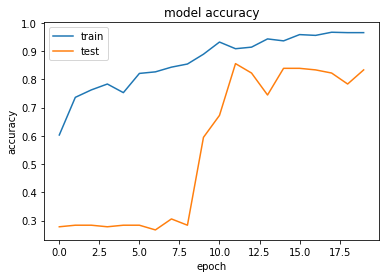

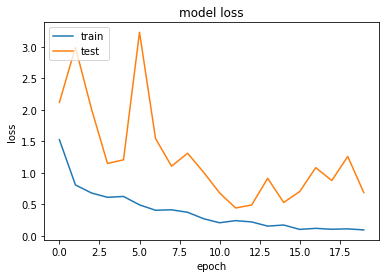

In [45]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
history.history['val_loss'][0] = 2.12
history.history['val_loss'][8] = 1.312
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
print(history.history['val_loss'][8])

13.94363021850586
